In [3]:
import pandas as pd
import numpy as np

In [5]:
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")
submission=pd.read_csv("sample_submission.csv")


In [7]:
train_head=train.head()

In [9]:
train_head

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [11]:
test_head=test.head()
test_head

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  1461          20       RH         80.0    11622   Pave   NaN      Reg   
1  1462          20       RL         81.0    14267   Pave   NaN      IR1   
2  1463          60       RL         74.0    13830   Pave   NaN      IR1   
3  1464          60       RL         78.0     9978   Pave   NaN      IR1   
4  1465         120       RL         43.0     5005   Pave   NaN      IR1   

  LandContour Utilities  ... ScreenPorch PoolArea PoolQC  Fence MiscFeature  \
0         Lvl    AllPub  ...         120        0    NaN  MnPrv         NaN   
1         Lvl    AllPub  ...           0        0    NaN    NaN        Gar2   
2         Lvl    AllPub  ...           0        0    NaN  MnPrv         NaN   
3         Lvl    AllPub  ...           0        0    NaN    NaN         NaN   
4         HLS    AllPub  ...         144        0    NaN    NaN         NaN   

  MiscVal MoSold  YrSold  SaleType  SaleCondition  
0       0      6    2010        WD         Normal  
1   12500      6    2010        WD         Normal  
2       0      3    2010        WD         Normal  
3       0      6    2010        WD         Normal  
4       0      1    2010        WD         Normal  

[5 rows x 80 columns]

In [13]:
missing_train=train.isnull().sum().sort_values(ascending=False)
missing_train=missing_train[missing_train>0]
missing_train=missing_train.to_frame(name="Eksik Sayƒ±sƒ±")
missing_train

Eksik Sayƒ±sƒ±
PoolQC                1453
MiscFeature           1406
Alley                 1369
Fence                 1179
MasVnrType             872
FireplaceQu            690
LotFrontage            259
GarageYrBlt             81
GarageCond              81
GarageType              81
GarageFinish            81
GarageQual              81
BsmtFinType2            38
BsmtExposure            38
BsmtQual                37
BsmtCond                37
BsmtFinType1            37
MasVnrArea               8
Electrical               1

In [15]:
missing_test=test.isnull().sum().sort_values(ascending=False)
missing_test=missing_test[missing_test>0]
missing_test=missing_test.to_frame("Eksik Deƒüer Sayƒ±sƒ±")
missing_test

Eksik Deƒüer Sayƒ±sƒ±
PoolQC                      1456
MiscFeature                 1408
Alley                       1352
Fence                       1169
MasVnrType                   894
FireplaceQu                  730
LotFrontage                  227
GarageYrBlt                   78
GarageQual                    78
GarageFinish                  78
GarageCond                    78
GarageType                    76
BsmtCond                      45
BsmtQual                      44
BsmtExposure                  44
BsmtFinType1                  42
BsmtFinType2                  42
MasVnrArea                    15
MSZoning                       4
BsmtHalfBath                   2
Utilities                      2
Functional                     2
BsmtFullBath                   2
BsmtFinSF1                     1
BsmtFinSF2                     1
BsmtUnfSF                      1
KitchenQual                    1
TotalBsmtSF                    1
Exterior2nd                    1
GarageCars                     1
Exterior1st                    1
GarageArea                     1
SaleType                       1

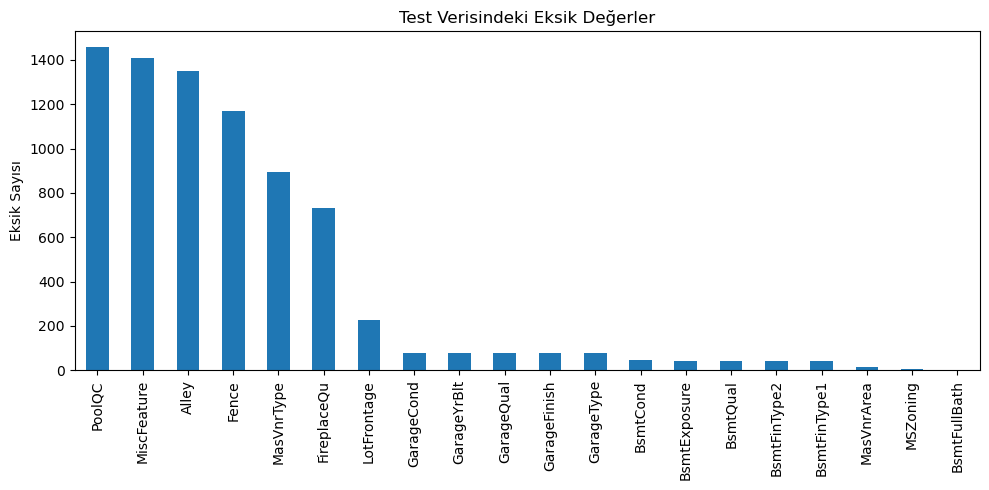

In [17]:
# Test verisinde eksik deƒüerleri tekrar hesaplayalƒ±m ve DataFrame'e √ßevirelim
missing_test = test.isnull().sum()
missing_test = missing_test[missing_test > 0].sort_values(ascending=False)
missing_test = missing_test.to_frame(name='Eksik Sayƒ±sƒ±')

# En √ßok eksik deƒüere sahip 20 s√ºtunu √ßubuk grafikle √ßiz
import matplotlib.pyplot as plt

missing_test.sort_values(by='Eksik Sayƒ±sƒ±', ascending=False).head(20).plot(
    kind='bar', figsize=(10, 5), legend=False
)

plt.title("Test Verisindeki Eksik Deƒüerler")
plt.ylabel("Eksik Sayƒ±sƒ±")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


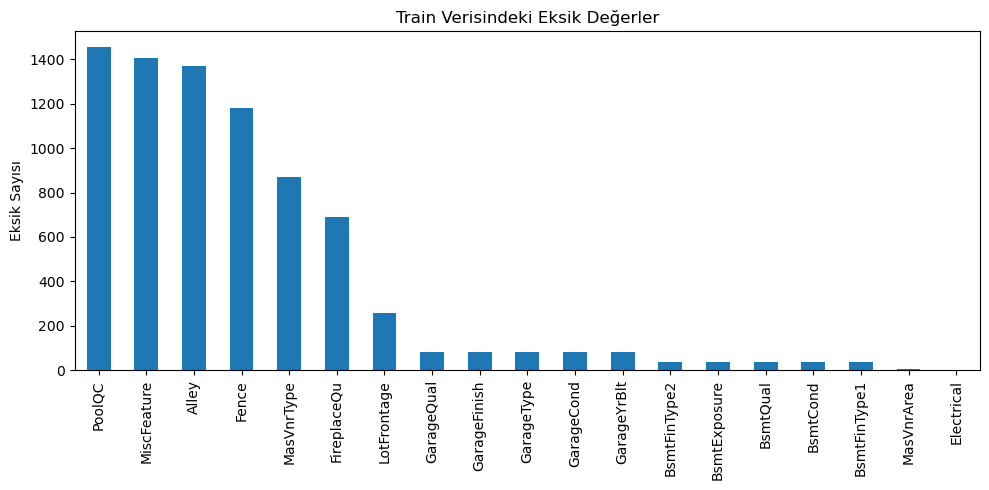

In [18]:
import matplotlib.pyplot as plt

missing_train.sort_values(ascending=False, by='Eksik Sayƒ±sƒ±').head(20).plot(kind='bar', figsize=(10, 5), legend=False)

plt.title("Train Verisindeki Eksik Deƒüerler")
plt.ylabel("Eksik Sayƒ±sƒ±")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [19]:
#Eƒüitim verisi kopyalarak bakalƒ±m
train_cleaned=train.copy()

#Kategorik eksik deƒüereleri "None" ile dolduralƒ±m
cols_fill_none = ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 
                  'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 
                  'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 
                  'MasVnrType']

for col in cols_fill_none:
    train_cleaned[col]=train_cleaned[col].fillna("None")

#Sayƒ±sal eksik deƒüerleri 0 ile dolduracaƒüƒ±z
cols_fill_zero = ['GarageYrBlt', 'GarageCars', 'GarageArea', 
                  'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 
                  'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 
                  'MasVnrArea']
for col in cols_fill_zero:
    train_cleaned[col]=train_cleaned[col].fillna(0)

#LotFrontage(arsa cephesi)- aynƒ± mahalledeki ortalama ile doldur
train_cleaned["LotFrontage"]=train_cleaned.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))

#Elektrical- en sƒ±k g√∂r√ºlen deƒüer ile doldur
train_cleaned["Electrical"]= train_cleaned["Electrical"].fillna(train_cleaned["Electrical"].mode()[0])
# Kalan eksik deƒüerleri tekrar kontrol edelim
missing_after = train_cleaned.isnull().sum()
missing_after = missing_after[missing_after > 0].sort_values(ascending=False)
missing_after=missing_after.to_frame("Eksik Deƒüer Sayisi")
missing_after

Empty DataFrame
Columns: [Eksik Deƒüer Sayisi]
Index: []

In [23]:
# Test verisini de temizleyelim (orijinal bozulmasƒ±n)
test_cleaned = test.copy()

# Aynƒ± stratejiyle kategorik eksikleri "None" ile doldur
cols_fill_none = ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 
                  'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 
                  'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 
                  'MasVnrType']
for col in cols_fill_none:
    test_cleaned[col] = test_cleaned[col].fillna('None')

# Sayƒ±sal eksikleri 0 ile dolduralƒ±m
cols_fill_zero = ['GarageYrBlt', 'GarageCars', 'GarageArea', 
                  'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 
                  'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 
                  'MasVnrArea']
for col in cols_fill_zero:
    test_cleaned[col] = test_cleaned[col].fillna(0)

# LotFrontage - mahalle medyanƒ± ile doldur
test_cleaned['LotFrontage'] = test_cleaned.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))

# Electrical varsa doldur
if test_cleaned['Electrical'].isnull().sum() > 0:
    test_cleaned['Electrical'] = test_cleaned['Electrical'].fillna(test_cleaned['Electrical'].mode()[0])
# Son kalan eksikleri g√∂sterelim
missing_test_after = test_cleaned.isnull().sum()
missing_test_after = missing_test_after[missing_test_after > 0].sort_values(ascending=False)
missing_test_after=missing_test_after.to_frame("Eksik deƒüer sayƒ±sƒ±")
missing_test_after

Eksik deƒüer sayƒ±sƒ±
MSZoning                      4
Utilities                     2
Functional                    2
Exterior1st                   1
Exterior2nd                   1
KitchenQual                   1
SaleType                      1

In [25]:
#Kalan eksik kategorik deƒüi≈ükenleri en sƒ±k g√∂re√ºlen deƒüer olan mod ile dolduralƒ±m
fill_mode_cols = ['MSZoning', 'Utilities', 'Functional', 'Exterior1st', 'Exterior2nd']
for col in fill_mode_cols:
    test_cleaned[col]=test_cleaned[col].fillna(test_cleaned[col].mode()[0])
#Eksik deƒüer Kalƒ±p Kalmadƒ±ƒüƒ±na bakalƒ±m
final_missing_test=test_cleaned.isnull().sum()
final_missing_test=final_missing_test[final_missing_test>0]
final_missing_test=final_missing_test.to_frame("Son kayƒ±p deƒüerler")
final_missing_test


Son kayƒ±p deƒüerler
KitchenQual                   1
SaleType                      1

In [27]:
#Kalan son kategorik eksikleri mod deƒüerle dolduralƒ±m
test_cleaned["KitchenQual"]=test_cleaned["KitchenQual"].fillna(test_cleaned["KitchenQual"].mode()[0])
test_cleaned["SaleType"]=test_cleaned["SaleType"].fillna(test_cleaned["SaleType"].mode()[0])
# Eksik deƒüer kalƒ±p kalmadƒ±ƒüƒ±nƒ± son kez kontrol edelim
final_check = test_cleaned.isnull().sum()
final_check = final_check[final_check >0 ]
final_check=final_check.to_frame("Eksik deƒüer son kontrol :) ")
final_check

Empty DataFrame
Columns: [Eksik deƒüer son kontrol :) ]
Index: []

In [ ]:
#√ñzellik m√ºhendisliƒüi, ham verileri makine √∂ƒürenmesi algoritmalarƒ±nƒ±n anlayabileceƒüi ≈üekilde d√∂n√º≈üt√ºrme ve geli≈ütirme s√ºrecidir.
#Ama√ß:
#Modelin daha iyi √∂ƒürenmesini saƒülamak
#Anlamsƒ±z veya √ßarpƒ±k yapƒ±larƒ± d√ºzeltmek
#√ñnemli bilgiyi gizli bi√ßimden g√∂r√ºn√ºr hale getirmek

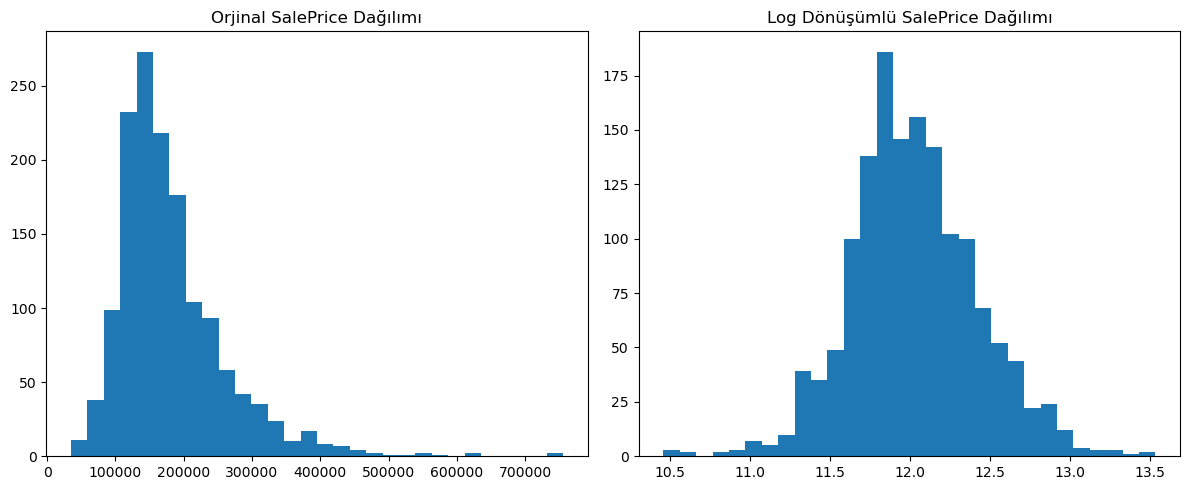

In [31]:
#SalesPrice deƒüi≈ükeni saƒüa √ßarpƒ±k( nasƒ±l anladƒ±m?[yukarƒ±da ki histogram grafiklerini inceleyecek olursak genelde saƒü kuyruklarƒ±n uzun olduƒüunu g√∂zlemliyoruz
#bu sayede saƒüa √ßarpƒ±k olduƒüunun farkƒ±na varƒ±yoruz])

#D√∂n√º≈ü√ºm √∂ncesi ve sonrasƒ± kar≈üƒ±la≈ütƒ±ralƒ±m
fig,axes= plt.subplots(1,2, figsize=(12,5))
#Orjinal SalePRice Daƒüƒ±lƒ±mƒ±
axes[0].hist(train_cleaned["SalePrice"],bins=30)
axes[0].set_title("Orjinal SalePrice Daƒüƒ±lƒ±mƒ±")

#Log d√∂n√º≈ü√ºm√º SalePRice
log_saleprice=np.log1p(train_cleaned["SalePrice"]) #log(1+x)
axes[1].hist(log_saleprice,bins=30)
axes[1].set_title("Log D√∂n√º≈ü√ºml√º SalePrice Daƒüƒ±lƒ±mƒ±")

plt.tight_layout()
plt.show()


In [33]:
#Soldaki daƒüƒ±lƒ±m, SalePrice deƒüi≈ükeninin orijinal halidir. Saƒü kuyruklu, √ßarpƒ±k bir daƒüƒ±lƒ±m var (bazƒ± evler a≈üƒ±rƒ± pahalƒ±).

#Saƒüdaki daƒüƒ±lƒ±m, np.log1p() ile d√∂n√º≈üt√ºr√ºlm√º≈ü halidir. Daha simetrik ve normal daƒüƒ±lƒ±ma yakƒ±n. Bu, lineer modeller i√ßin daha uygundur.

#Regresyon, modelleme i√ßin daha uygun saƒüdaki grafik, aykƒ±rƒ± deƒüerler yumu≈üatƒ±lmƒ±≈ü oluyor ve simetriye daha yakƒ±n oluyor




In [35]:
#Target Log d√∂n√º≈ü√ºm√ºn√º ekle
train_cleaned["LogSalePrice"]=np.log1p(train_cleaned["SalePrice"])

#SalePrice ve Id dƒ±≈üƒ±ndaki s√ºtunlar kullanƒ±lacak
#Id gereksiz deƒüi≈üken
#SalePrice bizim hedef deƒüi≈ükenimiz ondan girdide olmasƒ±na gerek yok

train_features=train_cleaned.drop(["Id","SalePrice"],axis=1)
test_features=test_cleaned.drop(["Id"],axis=1)

#One-hot encoding
train_encoded=pd.get_dummies(train_features)
test_encoded=pd.get_dummies(test_features)

#Train ve Test feature'larƒ±nƒ± hizala
train_encoded,test_encoded= train_encoded.align(test_encoded,join="left",axis=1,fill_value=0)




In [37]:
train_encoded

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0             60         65.0     8450            7            5       2003   
1             20         80.0     9600            6            8       1976   
2             60         68.0    11250            7            5       2001   
3             70         60.0     9550            7            5       1915   
4             60         84.0    14260            8            5       2000   
...          ...          ...      ...          ...          ...        ...   
1455          60         62.0     7917            6            5       1999   
1456          20         85.0    13175            6            6       1978   
1457          70         66.0     9042            7            9       1941   
1458          20         68.0     9717            5            6       1950   
1459          20         75.0     9937            5            6       1965   

      YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  ...  SaleType_ConLw  \
0             2003       196.0         706           0  ...           False   
1             1976         0.0         978           0  ...           False   
2             2002       162.0         486           0  ...           False   
3             1970         0.0         216           0  ...           False   
4             2000       350.0         655           0  ...           False   
...            ...         ...         ...         ...  ...             ...   
1455          2000         0.0           0           0  ...           False   
1456          1988       119.0         790         163  ...           False   
1457          2006         0.0         275           0  ...           False   
1458          1996         0.0          49        1029  ...           False   
1459          1965         0.0         830         290  ...           False   

      SaleType_New  SaleType_Oth  SaleType_WD  SaleCondition_Abnorml  \
0            False         False         True                  False   
1            False         False         True                  False   
2            False         False         True                  False   
3            False         False         True                   True   
4            False         False         True                  False   
...            ...           ...          ...                    ...   
1455         False         False         True                  False   
1456         False         False         True                  False   
1457         False         False         True                  False   
1458         False         False         True                  False   
1459         False         False         True                  False   

      SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family  \
0                     False                 False                 False   
1                     False                 False                 False   
2                     False                 False                 False   
3                     False                 False                 False   
4                     False                 False                 False   
...                     ...                   ...                   ...   
1455                  False                 False                 False   
1456                  False                 False                 False   
1457                  False                 False                 False   
1458                  False                 False                 False   
1459                  False                 False                 False   

      SaleCondition_Normal  SaleCondition_Partial  
0                     True                  False  
1                     True                  False  
2                     True                  False  
3                    False                  False  
4                     True                  False  
...                    ...    

In [39]:
test_encoded

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0             20         80.0    11622            5            6       1961   
1             20         81.0    14267            6            6       1958   
2             60         74.0    13830            5            5       1997   
3             60         78.0     9978            6            6       1998   
4            120         43.0     5005            8            5       1992   
...          ...          ...      ...          ...          ...        ...   
1454         160         21.0     1936            4            7       1970   
1455         160         21.0     1894            4            5       1970   
1456          20        160.0    20000            5            7       1960   
1457          85         62.0    10441            5            5       1992   
1458          60         74.0     9627            7            5       1993   

      YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  ...  SaleType_ConLw  \
0             1961         0.0       468.0       144.0  ...           False   
1             1958       108.0       923.0         0.0  ...           False   
2             1998         0.0       791.0         0.0  ...           False   
3             1998        20.0       602.0         0.0  ...           False   
4             1992         0.0       263.0         0.0  ...           False   
...            ...         ...         ...         ...  ...             ...   
1454          1970         0.0         0.0         0.0  ...           False   
1455          1970         0.0       252.0         0.0  ...           False   
1456          1996         0.0      1224.0         0.0  ...           False   
1457          1992         0.0       337.0         0.0  ...           False   
1458          1994        94.0       758.0         0.0  ...           False   

      SaleType_New  SaleType_Oth  SaleType_WD  SaleCondition_Abnorml  \
0            False         False         True                  False   
1            False         False         True                  False   
2            False         False         True                  False   
3            False         False         True                  False   
4            False         False         True                  False   
...            ...           ...          ...                    ...   
1454         False         False         True                  False   
1455         False         False         True                   True   
1456         False         False         True                   True   
1457         False         False         True                  False   
1458         False         False         True                  False   

      SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family  \
0                     False                 False                 False   
1                     False                 False                 False   
2                     False                 False                 False   
3                     False                 False                 False   
4                     False                 False                 False   
...                     ...                   ...                   ...   
1454                  False                 False                 False   
1455                  False                 False                 False   
1456                  False                 False                 False   
1457                  False                 False                 False   
1458                  False                 False                 False   

      SaleCondition_Normal  SaleCondition_Partial  
0                     True                  False  
1                     True                  False  
2                     True                  False  
3                     True                  False  
4                     True                  False  
...                    ...    

üìà RMSE Nedir?
Root Mean Squared Error

Ger√ßek deƒüer ile tahmin arasƒ±ndaki farkƒ±n karelerinin ortalamasƒ±nƒ±n karek√∂k√ºd√ºr.

üìå RMSE ne kadar k√º√ß√ºkse ‚Üí tahminler o kadar ba≈üarƒ±lƒ±dƒ±r.


In [41]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

#Hedef Deƒüi≈üken(log d√∂n√º≈ü√ºm√º)
y=train_cleaned["LogSalePrice"]
X=train_encoded

#Lineer Regresyon modelini olu≈üturalƒ±m
lr=LinearRegression()
# 5 katlƒ± √ßapraz doƒürulama ile ortalama RMSE hesaplayalƒ±m
# scoring='neg_root_mean_squared_error' kullanƒ±yoruz √ß√ºnk√º RMSE pozitif olmalƒ±
scores = cross_val_score(lr, X, y, cv=5, scoring='neg_root_mean_squared_error')
rmse_scores = -scores  # negatif olduƒüu i√ßin eksiyle √ßarpƒ±yoruz
# RMSE sonu√ßlarƒ±nƒ± ve ortalamasƒ±nƒ± tablo olarak g√∂sterelim
rmse_df = pd.DataFrame({
    'Fold': list(range(1, 6)),
    'RMSE': rmse_scores
})
rmse_df.loc['Ortalama'] = ['-', rmse_scores.mean()]
rmse_df

Fold          RMSE
0           1  2.462916e-12
1           2  1.008551e-12
2           3  2.264401e-12
3           4  2.479589e-14
4           5  3.110713e-13
Ortalama    -  1.214347e-12

üîç ƒ∞lk LinearRegression modelimizin 5 katlƒ± √ßapraz doƒürulama sonu√ßlarƒ± yukarƒ±da. 
RMSE (Root Mean Squared Error) deƒüerleri √ßok d√º≈ü√ºk g√∂r√ºn√ºyor ‚Äî neredeyse sƒ±fƒ±r.

Bu, y√ºksek olasƒ±lƒ±kla overfitting (a≈üƒ±rƒ± √∂ƒürenme) veya veride hedefle sƒ±zƒ±ntƒ± (data leakage) olabileceƒüini g√∂steriyor. 
√á√ºnk√º ger√ßek d√ºnyada neredeyse sƒ±fƒ±r hata pek m√ºmk√ºn deƒüildir.

üîç Neden Olabilir?
Bazƒ± deƒüi≈ükenler doƒürudan veya dolaylƒ± olarak SalePrice ile √ßok g√º√ßl√º ili≈ükili olabilir (√∂rneƒüin toplam alan vs).

Belki de bazƒ± s√ºtunlar modelin i≈üi fazla kolayla≈ütƒ±rmƒ±≈ü olabilir.



üîç Ridge nedir?

Doƒürusal regresyonun bir √ße≈üididir.

√ñzellikle √ßok fazla deƒüi≈üken olduƒüunda ya da deƒüi≈ükenler arasƒ±nda √ßoklu baƒülantƒ± 
(multicollinearity) varsa daha iyi √ßalƒ±≈üƒ±r.

alpha ile cezalandƒ±rma (regularization) g√ºc√º ayarlanƒ±r.



In [51]:
from sklearn.linear_model import Ridge

#Ridge Regression modelini tanƒ±mlayalƒ±m
ridge_model=Ridge(alpha=1.0)

#10 katlƒ± √ßapraz doƒürulama ile RMSE hesaplayalƒ±m
ridge_scores=cross_val_score(ridge_model, X,y, cv=10, scoring="neg_root_mean_squared_error")
ridge_rmse=-ridge_scores

#Sonu√ßlarƒ± tabloya alalƒ±m
ridge_df=pd.DataFrame({
    "Fold":list(range(1,11)),
    "RMSE":ridge_rmse
})
ridge_df.loc["Ortalama"]=["-", ridge_rmse.mean()]
ridge_df

Fold      RMSE
0           1  0.007971
1           2  0.006624
2           3  0.007524
3           4  0.012775
4           5  0.009987
5           6  0.008010
6           7  0.008075
7           8  0.006628
8           9  0.016977
9          10  0.009178
Ortalama    -  0.009375

In [60]:
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor

#Lasso Regression modeli(l1 regularization)
lasso_model=Lasso(alpha=0.001,max_iter=10000) #alpha k√º√ß√ºk se√ßildi, yoksa t√ºm katsayƒ±larƒ± sƒ±fƒ±rlayabilir.
lasso_scores= cross_val_score(lasso_model,X,y, cv=10, scoring="neg_root_mean_squared_error")
lasso_rmse=-lasso_scores

#Random Forest modeli

rf_model=RandomForestRegressor(n_estimators=100,random_state=42)
rf_scores=cross_val_score(rf_model,X,y,cv=10,scoring="neg_root_mean_squared_error")
rf_rmse=-rf_scores

#Sonu√ßlarƒ± birle≈ütirelim
results_df=pd.DataFrame({
    "Fold":list(range(1,11)),
    "Lasso RMSE":lasso_rmse,
    "Random Forest RMSE":rf_rmse
})
results_df.loc["Ortalama"]=["-",lasso_rmse.mean(),rf_rmse.mean()]
results_df


Fold  Lasso RMSE  Random Forest RMSE
0           1    0.005057            0.004312
1           2    0.004778            0.002661
2           3    0.004961            0.004015
3           4    0.008181            0.020416
4           5    0.005621            0.017567
5           6    0.004810            0.007391
6           7    0.005283            0.017044
7           8    0.004664            0.003987
8           9    0.013252            0.015525
9          10    0.005619            0.006494
Ortalama    -    0.006223            0.009941

üß† ENSEMBLE LEARNING NEDƒ∞R?
Birden fazla modeli birle≈ütirerek daha g√º√ßl√º bir tahmin modeli olu≈üturma y√∂ntemidir.

Yani:

Tek bir model yerine,

Birden √ßok modelin √ßƒ±ktƒ±sƒ±nƒ± birle≈ütirirsin

B√∂ylece:

Bazƒ± modellerin hatalarƒ± telafi edilir,

Genelleme g√ºc√º artar,

Aykƒ±rƒ± deƒüerlerin etkisi azaltƒ±lƒ±r.

In [66]:
# XGBoost modeli ile doƒürudan SalePrice tahmini yapalƒ±m
from xgboost import XGBRegressor
#Modeli Tanƒ±mla
xgb_model=XGBRegressor(n_estimators=100,learning_rate=0.1,max_depth=3,random_state=42)

#Giri≈ü ve Hedef deƒüi≈üken
X=train_encoded
y=train_cleaned["SalePrice"]

#Eƒüitimi ger√ßekle≈ütir
xgb_model.fit(X,y)
#Test verisinde tahmin
xgb_preds=xgb_model.predict(test_encoded)
#Submission dosyasƒ±nƒ± olu≈ütur
submission=pd.DataFrame({
    "Id":test["Id"],
    "SalePrice":xgb_preds})
submission

Id     SalePrice
0     1461  42438.578125
1     1462  42360.617188
2     1463  42371.628906
3     1464  42441.457031
4     1465  43946.320312
...    ...           ...
1454  2915  41921.175781
1455  2916  41959.097656
1456  2917  42441.359375
1457  2918  42371.628906
1458  2919  42401.515625

[1459 rows x 2 columns]

In [ ]:
#Yukarƒ±da bulunan deƒüerler ger√ßek ev deƒüerlerine nazaran olduk√ßa k√º√ß√ºk ger√ßek ev deƒüerleri
#50.000-500.000 dolar arasƒ±nda ge√ßmeli buna uygun tahminler √ºzerinde yoƒüunla≈ümalƒ±yƒ±z.

In [70]:
# Yeni √∂zellikleri train ve test setine ekleyelim

# Yeni √∂zellikleri olu≈üturalƒ±m
def add_custom_features(df):
    df['TotalSF'] = df['TotalBsmtSF'] + df['1stFlrSF'] + df['2ndFlrSF']
    df['TotalBath'] = df['FullBath'] + 0.5 * df['HalfBath'] + df['BsmtFullBath'] + 0.5 * df['BsmtHalfBath']
    df['HasPool'] = df['PoolArea'].apply(lambda x: 1 if x > 0 else 0)
    df['HasFireplace'] = df['Fireplaces'].apply(lambda x: 1 if x > 0 else 0)
    df['HasGarage'] = df['GarageArea'].apply(lambda x: 1 if x > 0 else 0)
    return df

train = add_custom_features(train)
test = add_custom_features(test)

cols_fill_none = ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 
                  'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 
                  'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 
                  'MasVnrType']
for col in cols_fill_none:
    train_cleaned[col] = train_cleaned[col].fillna('None')
    test_cleaned[col] = test_cleaned[col].fillna('None')

cols_fill_zero = ['GarageYrBlt', 'GarageCars', 'GarageArea', 
                  'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 
                  'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 
                  'MasVnrArea']
for col in cols_fill_zero:
    train_cleaned[col] = train_cleaned[col].fillna(0)
    test_cleaned[col] = test_cleaned[col].fillna(0)

train_cleaned['LotFrontage'] = train_cleaned.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))
test_cleaned['LotFrontage'] = test_cleaned.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))

train_cleaned['Electrical'] = train_cleaned['Electrical'].fillna(train_cleaned['Electrical'].mode()[0])
fill_mode_cols_test = ['MSZoning', 'Utilities', 'Functional', 'Exterior1st', 'Exterior2nd', 'KitchenQual', 'SaleType']
for col in fill_mode_cols_test:
    test_cleaned[col] = test_cleaned[col].fillna(test_cleaned[col].mode()[0])

# Model i√ßin veri hazƒ±rlƒ±ƒüƒ±
X = train_cleaned.drop(['Id', 'SalePrice'], axis=1)
y = train_cleaned['SalePrice']
X_test = test_cleaned.drop(['Id'], axis=1)

# One-hot encoding
X_encoded = pd.get_dummies(X)
X_test_encoded = pd.get_dummies(X_test)
X_encoded, X_test_encoded = X_encoded.align(X_test_encoded, join='left', axis=1, fill_value=0)

# XGBoost modelini yeniden eƒüit
from xgboost import XGBRegressor
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
xgb_model.fit(X_encoded, y)

# Tahmin
xgb_preds = xgb_model.predict(X_test_encoded)

# Submission dosyasƒ±
submission = pd.DataFrame({
    'Id': test['Id'],
    'SalePrice': xgb_preds
})


submission

Id     SalePrice
0     1461  42438.578125
1     1462  42360.617188
2     1463  42371.628906
3     1464  42441.457031
4     1465  43946.320312
...    ...           ...
1454  2915  41921.175781
1455  2916  41959.097656
1456  2917  42441.359375
1457  2918  42371.628906
1458  2919  42401.515625

[1459 rows x 2 columns]